- 파일
  - 관련 데이터셋 파일은 dsba_project_data 공유 폴더에 올려놓겠습니다.

# 데이터셋 로드

In [1]:
#코랩에서 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#파일 경로 지정(본인 구글 드라이브 폴더명에 따라 수정 바람)
base_path = '/content/drive/MyDrive/digital_smart_busan/DSBA_project_1/dsba_project_data/'

#데이터 불러오기
export_df = pd.read_excel(base_path + 'volume_of_exports.xlsx')
gdp_df = pd.read_excel(base_path + 'gdp_growth_rate.xlsx')
leading_df = pd.read_excel(base_path + 'oecd_leading.xlsx')
exchange_df = pd.read_excel(base_path + 'won_dollar.xlsx')
gold_df = pd.read_csv(base_path + 'gold_prices.csv')
gas_df = pd.read_csv(base_path + 'natural_gas_prices.csv')
brent_df = pd.read_excel(base_path + 'brent_price.xlsx')
#데이터 확인
print("데이터 확인")
print("수출량 :", export_df.shape)
print("GDP성장률 :", gdp_df.shape)
print("경기선행지수 :", leading_df.shape)
print("환율 :", exchange_df.shape)
print("금 :", gold_df.shape)
print("천연가스 :", gas_df.shape)
print("유가 :", brent_df.shape)

데이터 확인
수출량 : (120, 2)
GDP성장률 : (40, 2)
경기선행지수 : (120, 4)
환율 : (120, 2)
금 : (120, 2)
천연가스 : (120, 2)
유가 : (120, 2)


In [3]:
display("수출량 :", export_df.head())
display("GDP성장률 :", gdp_df.head())
display("경기선행지수 :", leading_df.head())
display("환율 :", exchange_df.head())
display("금 :", gold_df.head())
display("천연가스 :", gas_df.head())
display("유가 :", brent_df.head())

'수출량 :'

,date,수출량(Ton)
0,2024-12-01,7696030
1,2024-11-01,7556141
2,2024-10-01,8004480
3,2024-09-01,6946622
4,2024-08-01,7602667


'GDP성장률 :'

,date,gdp_growth
0,20244/4,1.2
1,20243/4,1.5
2,20242/4,2.3
3,20241/4,3.3
4,20234/4,2.1


'경기선행지수 :'

,date,korea,USA,china
0,2024-12,100.6691,100.42190,99.65845
1,2024-11,100.6294,100.28610,99.31903
2,2024-10,100.6307,100.12110,99.01940
3,2024-09,100.6532,99.96052,98.79619
4,2024-08,100.6739,99.82787,98.69521


'환율 :'

,date,환율
0,2024-12-01,"1,472.5"
1,2024-11-01,"1,394.7"
2,2024-10-01,"1,379.9"
3,2024-09-01,"1,307.8"
4,2024-08-01,"1,336.0"


'금 :'

,date,Price
0,Dec-24,"2,653.30"
1,Nov-24,"2,681.00"
2,Oct-24,"2,761.60"
3,Sep-24,"2,647.90"
4,Aug-24,"2,516.00"


'천연가스 :'

,date,Price
0,Dec-24,3.633
1,Nov-24,3.363
2,Oct-24,2.707
3,Sep-24,2.923
4,Aug-24,2.127


'유가 :'

,date,brent
0,2024-12,73.86
1,2024-11,74.35
2,2024-10,75.63
3,2024-09,74.02
4,2024-08,80.36


# 데이터프레임 결합하기

## 형태가 다른 데이터프레임 처리

- problem : 학습에 사용할 데이터 중, gdp 성장률 데이터는 월별 데이터가 아닌 분기별 데이터를 가지고 있다. 즉, 다른 월별 데이터들과 concatenation을 하기 전에 데이터 프레임 형태를 변형시킬 필요가 있다.
- solution : 각 분기를 해당하는 3개월로 복제할 필요가 있다. (1분기 -> 1,2,3월  / 2분기 -> 4,5,6월 / 3분기 -> 7,8,9월 / 4분기 -> 10,11,12월)
  -

In [4]:
gdp_df.head()

,date,gdp_growth
0,20244/4,1.2
1,20243/4,1.5
2,20242/4,2.3
3,20241/4,3.3
4,20234/4,2.1


In [5]:
gdp_df.tail(10)

,date,gdp_growth
30,20172/4,3.0
31,20171/4,3.5
32,20164/4,2.8
33,20163/4,3.0
34,20162/4,3.9
35,20161/4,3.0
36,20154/4,3.6
37,20153/4,3.5
38,20152/4,1.9
39,20151/4,2.7


In [6]:
gdp_df.info()
#object형인 date를 pd.to_datetime을 통해 날짜형식으로 바꿀 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        40 non-null     object 
 1   gdp_growth  40 non-null     float64
dtypes: float64(1), object(1)
memory usage: 772.0+ bytes


- iterrows() : 각 행을 꺼내서 반복
  - idx : 행의 인덱스 번호
  - row : 행의 내용 전체
  - row['date'] -> 20244/4
  - row['gdp_growth'] ->1.2

In [7]:
import pandas as pd
def expand_quarterly_to_monthly(gdp_df):
    # 월별 날짜 만들기 (내림차순)
    monthly_dates = pd.date_range(start='2015-01-01', end='2024-12-01', freq='MS')[::-1]

    monthly_gdp = []
    for value in gdp_df['gdp_growth']:
        monthly_gdp.extend([value] * 3)  # 각 분기값을 3개월로 복사

    # 결과 DataFrame 만들기
    gdp_growth_df = pd.DataFrame({
        'date': monthly_dates,
        'gdp_growth': monthly_gdp
    })

    return gdp_growth_df


In [8]:
gdp_growth_df = expand_quarterly_to_monthly(gdp_df)
display(gdp_growth_df.head(10))
print(type(gdp_growth_df))
print(gdp_growth_df.shape)

,date,gdp_growth
0,2024-12-01,1.2
1,2024-11-01,1.2
2,2024-10-01,1.2
3,2024-09-01,1.5
4,2024-08-01,1.5
5,2024-07-01,1.5
6,2024-06-01,2.3
7,2024-05-01,2.3
8,2024-04-01,2.3
9,2024-03-01,3.3


<class 'pandas.core.frame.DataFrame'>
(120, 2)


## 데이터셋 합치기

In [9]:
gdp_growth_df.shape

(120, 2)

In [10]:
# 필요한 컬럼만 가져와서 Series로 저장
export = export_df['수출량(Ton)'].values
gdp = gdp_growth_df['gdp_growth'].values
exchange = exchange_df['환율'].values
gold = gold_df['Price'].values
gas = gas_df['Price'].values
korea_leading = leading_df['korea'].values
usa_leading = leading_df['USA'].values
china_leading = leading_df['china'].values
brent = brent_df['brent'].values

# 공통 날짜 인덱스
dates = pd.date_range(start='2015-01-01', end='2024-12-01', freq='MS')[::-1]

# 하나의 데이터프레임으로 만들기
final_df = pd.DataFrame({
    'date': dates,
    'export': export,
    'gdp_growth': gdp,
    'exchange_rate': exchange,
    'gold_price': gold,
    'gas_price': gas,
    'korea_lead': korea_leading,
    'usa_lead' : usa_leading,
    'china_lead' : china_leading,
    'brent_price' : brent
})

# 날짜를 인덱스로
final_df.set_index('date', inplace=True)
final_df.index = final_df.index.strftime('%Y-%m') #날짜 표시 형식 변경

# 결과 확인
display(final_df.head())

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price
date,,,,,,,,,
2024-12,7696030,1.2,"1,472.5","2,653.30",3.633,100.6691,100.42190,99.65845,73.86
2024-11,7556141,1.2,"1,394.7","2,681.00",3.363,100.6294,100.28610,99.31903,74.35
2024-10,8004480,1.2,"1,379.9","2,761.60",2.707,100.6307,100.12110,99.01940,75.63
2024-09,6946622,1.5,"1,307.8","2,647.90",2.923,100.6532,99.96052,98.79619,74.02
2024-08,7602667,1.5,"1,336.0","2,516.00",2.127,100.6739,99.82787,98.69521,80.36


#데이터 전처리

In [11]:
final_df.info()
#학습이 잘 되도록 type을 맞춰줄 필요가 있다.

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 2024-12 to 2015-01
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   export         120 non-null    int64  
 1   gdp_growth     120 non-null    float64
 2   exchange_rate  120 non-null    object 
 3   gold_price     120 non-null    object 
 4   gas_price      120 non-null    float64
 5   korea_lead     120 non-null    float64
 6   usa_lead       120 non-null    float64
 7   china_lead     120 non-null    float64
 8   brent_price    120 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 9.4+ KB


## 데이터 타입 통일

- object type의 데이터를 float으로 변환 -> 쉼표 제거 후 타입 변경

In [12]:
#쉼표 제거
final_df['exchange_rate'] = final_df['exchange_rate'].astype(str).str.replace(',', '')
final_df['gold_price'] = final_df['gold_price'].astype(str).str.replace(',', '')
#타입 변경
final_df['exchange_rate'] = final_df['exchange_rate'].astype(float)
final_df['gold_price'] = final_df['gold_price'].astype(float)

In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 2024-12 to 2015-01
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   export         120 non-null    int64  
 1   gdp_growth     120 non-null    float64
 2   exchange_rate  120 non-null    float64
 3   gold_price     120 non-null    float64
 4   gas_price      120 non-null    float64
 5   korea_lead     120 non-null    float64
 6   usa_lead       120 non-null    float64
 7   china_lead     120 non-null    float64
 8   brent_price    120 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 9.4+ KB


In [14]:
final_df.head()

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price
date,,,,,,,,,
2024-12,7696030,1.2,1472.5,2653.3,3.633,100.6691,100.42190,99.65845,73.86
2024-11,7556141,1.2,1394.7,2681.0,3.363,100.6294,100.28610,99.31903,74.35
2024-10,8004480,1.2,1379.9,2761.6,2.707,100.6307,100.12110,99.01940,75.63
2024-09,6946622,1.5,1307.8,2647.9,2.923,100.6532,99.96052,98.79619,74.02
2024-08,7602667,1.5,1336.0,2516.0,2.127,100.6739,99.82787,98.69521,80.36


In [15]:
final_df.describe()

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price
count,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,7.815500e+06,2.515000,1197.699167,1613.020833,3.143133,100.175821,99.635056,99.543176,66.176583
std,1.266110e+06,1.592137,95.827350,403.062332,1.372725,1.137826,1.179031,2.363725,19.438264
min,5.544414e+06,-2.600000,1063.500000,1060.200000,1.640000,97.743370,92.778850,84.448040,18.380000
25%,7.127376e+06,1.800000,1120.350000,1273.325000,2.443000,99.268232,99.103773,98.792137,51.275000
50%,7.590399e+06,2.750000,1169.750000,1548.050000,2.778000,100.344400,99.686225,99.827410,64.780000
75%,8.159484e+06,3.425000,1258.050000,1887.825000,3.082500,100.800525,100.350500,100.569550,80.112500
max,1.666224e+07,7.000000,1472.500000,2761.600000,9.127000,102.747000,101.325100,102.827100,122.710000


## 이상치 확인
- 확인 결과, 실제 발생한 사건에 의한 값이라 제거는 하지 않음
- 스케일링 방식을 위해 이상치 분포 확인
  - RobustScaler : 아웃라이어가 많은 경우 아웃라이어의 영향을 효과적으로 최소화해주는 정규화 방법


In [16]:
import pandas as pd

# IQR 방식
Q1 = final_df['export'].quantile(0.25)
Q3 = final_df['export'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 위치(index)와 값 확인
outlier_info = final_df[(final_df['export'] < lower_bound) | (final_df['export'] > upper_bound)]
outlier_indices = outlier_info.index.tolist()

# 보여주기
print("이상치 인덱스:", outlier_indices)
print("이상치 행:")
print(outlier_info)


이상치 인덱스: ['2020-05', '2019-07', '2019-06', '2018-10', '2018-09', '2018-06', '2018-05', '2017-06']
이상치 행:
           export  gdp_growth  exchange_rate  gold_price  gas_price  \
date                                                                  
2020-05   5544414        -2.6         1238.5      1751.7      1.849   
2019-07  10206305         2.2         1183.1      1437.8      2.233   
2019-06  10792056         2.4         1154.7      1413.7      2.308   
2018-10   9892454         3.5         1139.6      1215.0      3.261   
2018-09  10433411         2.6         1109.3      1196.2      3.008   
2018-06  10699152         3.3         1114.5      1254.5      2.924   
2018-05  10341767         3.3         1077.7      1304.7      2.952   
2017-06  16662241         3.0         1144.1      1242.3      3.035   

         korea_lead   usa_lead  china_lead  brent_price  
date                                                     
2020-05    99.26209   94.36851    95.94892        29.38  
2019-07   

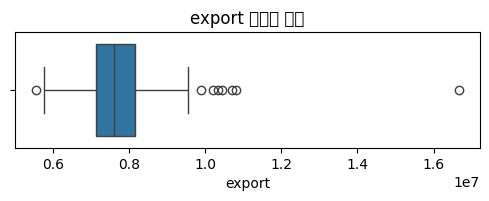

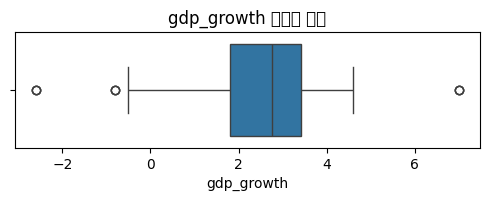

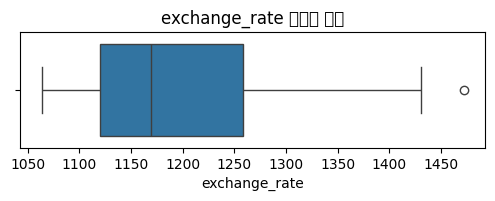

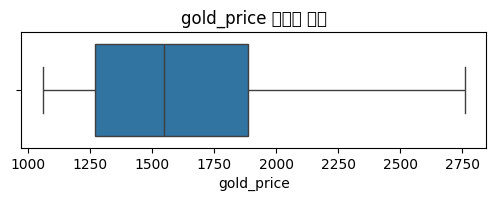

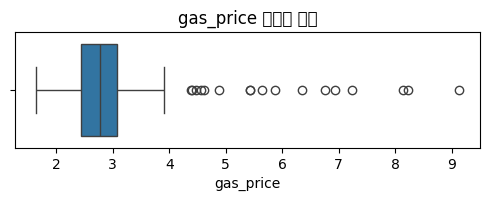

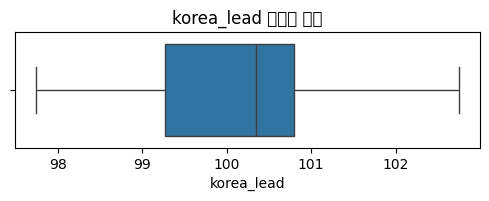

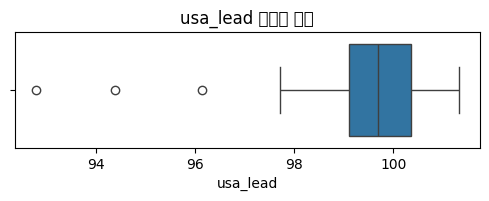

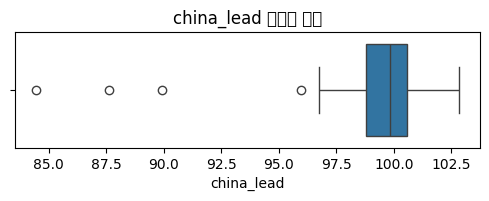

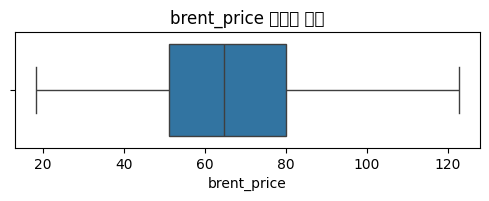

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = final_df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=final_df[col])
    plt.title(f'{col} 이상치 확인')
    plt.show()


## scaling
- StandardScaler: 값들이 정규 분포에 가깝거나 선형 모델을 사용할 때

- MinMaxScaler: 값들을 특정 범위로 맞추고 싶을 때 (특히 신경망)

- RobustScaler: 이상치가 많을 때 사용
  - gas_price , usa , china

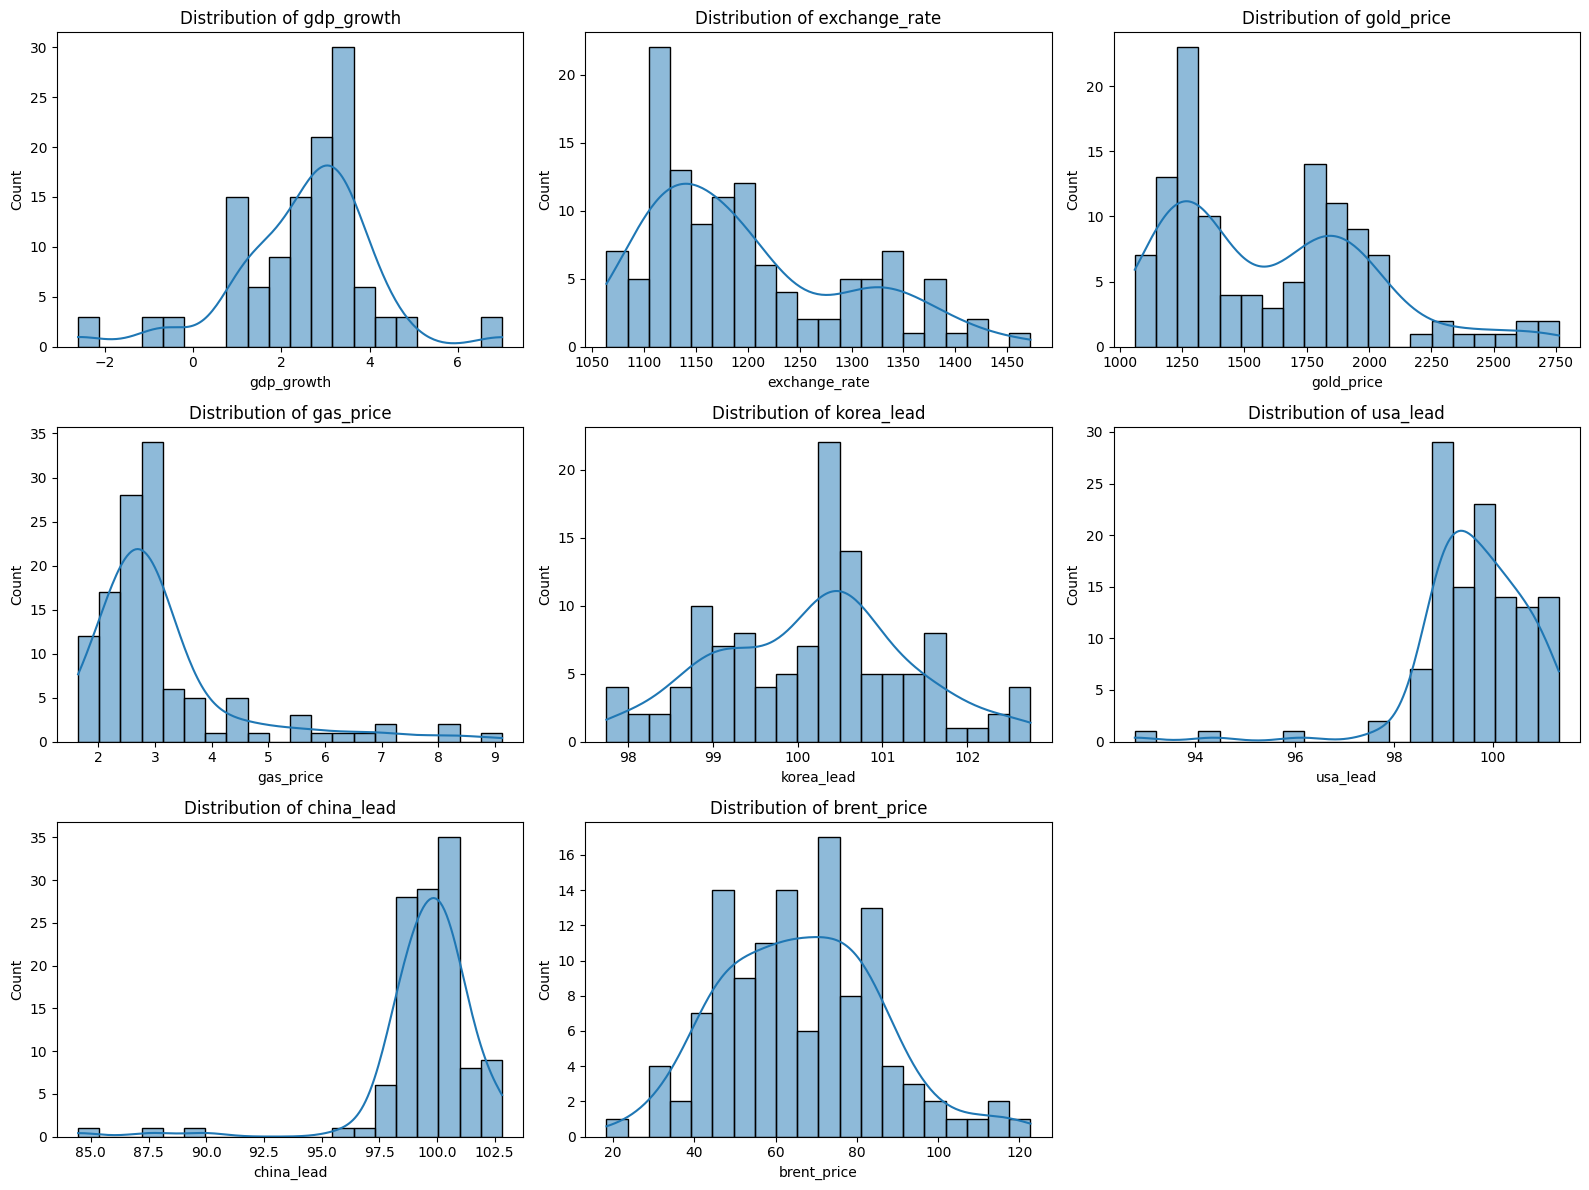

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 피처 리스트
features = ['gdp_growth', 'exchange_rate', 'gold_price', 'gas_price',
            'korea_lead', 'usa_lead', 'china_lead', 'brent_price']

# 시각화
plt.figure(figsize=(16, 12))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(final_df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

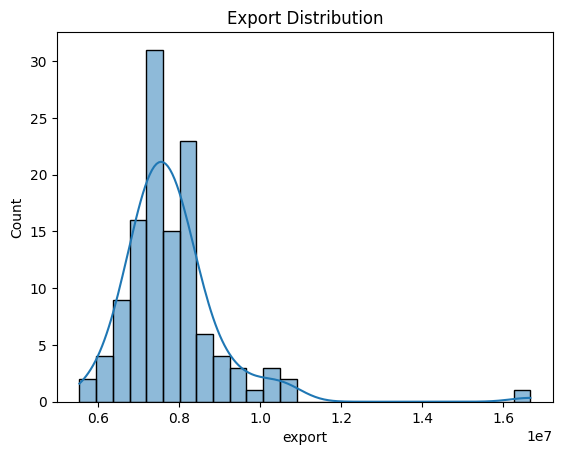

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(final_df['export'], kde=True)
plt.title("Export Distribution")
plt.show()

- standard scaler : gdp_growth ,   korea_lead, brent_price
- 로그 변환 및 min-max scaling 필요 : gold_price, exchange_rate, gas_price, usa_lead, china_lead , export

In [20]:
#정규분포에 가까운 데이터
from sklearn.preprocessing import StandardScaler

standard_cols = ['gdp_growth', 'korea_lead', 'brent_price']
standard_scaler = StandardScaler()
final_df[standard_cols] = standard_scaler.fit_transform(final_df[standard_cols])
final_df.head()

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price
date,,,,,,,,,
2024-12,7696030,-0.829397,1472.5,2653.3,3.633,0.435345,100.42190,99.65845,0.396930
2024-11,7556141,-0.829397,1394.7,2681.0,3.363,0.400308,100.28610,99.31903,0.422244
2024-10,8004480,-0.829397,1379.9,2761.6,2.707,0.401455,100.12110,99.01940,0.488369
2024-09,6946622,-0.640181,1307.8,2647.9,2.923,0.421312,99.96052,98.79619,0.405196
2024-08,7602667,-0.640181,1336.0,2516.0,2.127,0.439581,99.82787,98.69521,0.732724


In [21]:
final_df.describe()

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price
count,1.200000e+02,1.200000e+02,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000,1.200000e+02
mean,7.815500e+06,1.813364e-16,1197.699167,1613.020833,3.143133,1.132890e-15,99.635056,99.543176,-3.700743e-16
std,1.266110e+06,1.004193e+00,95.827350,403.062332,1.372725,1.004193e+00,1.179031,2.363725,1.004193e+00
min,5.544414e+06,-3.226134e+00,1063.500000,1060.200000,1.640000,-2.146769e+00,92.778850,84.448040,-2.469201e+00
25%,7.127376e+06,-4.509650e-01,1120.350000,1273.325000,2.443000,-8.009960e-01,99.103773,98.792137,-7.698251e-01
50%,7.590399e+06,1.482193e-01,1169.750000,1548.050000,2.778000,1.487798e-01,99.686225,99.827410,-7.214837e-02
75%,8.159484e+06,5.739555e-01,1258.050000,1887.825000,3.082500,5.513347e-01,100.350500,100.569550,7.199382e-01
max,1.666224e+07,2.828780e+00,1472.500000,2761.600000,9.127000,2.269204e+00,101.325100,102.827100,2.920552e+00


In [22]:
#로그변환 후 min-max_scaling
from sklearn.preprocessing import MinMaxScaler
import numpy as np

skewed_cols = ['exchange_rate', 'gold_price', 'gas_price', 'usa_lead', 'china_lead']
for col in skewed_cols:
    final_df[col + '_log'] = np.log1p(final_df[col])  # 로그 변환

minmax_scaler = MinMaxScaler()
final_df[[col + '_scaled' for col in skewed_cols]] = minmax_scaler.fit_transform(final_df[[col + '_log' for col in skewed_cols]])


In [23]:
# 삭제할 컬럼: 원본 + log
columns_to_drop = ['gold_price', 'gas_price', 'usa_lead', 'china_lead',
                   'gold_price_log', 'gas_price_log', 'usa_lead_log', 'china_lead_log',
                   'exchange_rate', 'exchange_rate_log']

# 데이터프레임에서 삭제
final_df = final_df.drop(columns=columns_to_drop)


In [24]:
final_df.describe()

,export,gdp_growth,korea_lead,brent_price,exchange_rate_scaled,gold_price_scaled,gas_price_scaled,usa_lead_scaled,china_lead_scaled
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000
mean,7.815500e+06,1.813364e-16,1.132890e-15,-3.700743e-16,0.355787,0.407692,0.305269,0.808248,0.833529
std,1.266110e+06,1.004193e+00,1.004193e+00,1.004193e+00,0.239158,0.251076,0.198200,0.136348,0.126534
min,5.544414e+06,-3.226134e+00,-2.146769e+00,-2.469201e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.127376e+06,-4.509650e-01,-8.009960e-01,-7.698251e-01,0.160020,0.191285,0.197518,0.748352,0.796541
50%,7.590399e+06,1.482193e-01,1.487798e-01,-7.214837e-02,0.292615,0.395255,0.266594,0.814873,0.849517
75%,8.159484e+06,5.739555e-01,5.513347e-01,7.199382e-01,0.516240,0.602601,0.324242,0.890270,0.887160
max,1.666224e+07,2.828780e+00,2.269204e+00,2.920552e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
#target값은 극단값의 영향을 적게 받는 robust scaler 사용
from sklearn.preprocessing import RobustScaler

# 스케일링
scaler = RobustScaler()
final_df['export_scaled'] = scaler.fit_transform(final_df[['export']])

# 예측 결과 또는 기존 scaled 데이터를 다시 원래 값으로 변환
final_df['export_restored'] = scaler.inverse_transform(final_df[['export_scaled']])
final_df = final_df.drop(columns=['export'])
final_df.head()

,gdp_growth,korea_lead,brent_price,exchange_rate_scaled,gold_price_scaled,gas_price_scaled,usa_lead_scaled,china_lead_scaled,export_scaled,export_restored
date,,,,,,,,,,
2024-12,-0.829397,0.435345,0.396930,1.000000,0.958202,0.418339,0.898344,0.840909,0.102345,7696030.0
2024-11,-0.829397,0.400308,0.422244,0.833163,0.969053,0.373677,0.882982,0.823571,-0.033192,7556141.0
2024-10,-0.829397,0.401455,0.488369,0.800375,1.000000,0.252482,0.864288,0.808217,0.401199,8004480.0
2024-09,-0.640181,0.421312,0.405196,0.635445,0.956073,0.294607,0.846066,0.796749,-0.623750,6946622.0
2024-08,-0.640181,0.439581,0.732724,0.701010,0.902689,0.125924,0.830991,0.791553,0.011886,7602667.0


# EDA
- 데이터프레임 설명
  - gdp_growth : gdp 성장률
  - exchange_rage : 원달러 환율
  - korea_lead : oecd 한국 경기선행지수
  - usa_lead_scaled : oecd 미국 경기선행지수
  - china_lead_scaled : oecd 중국 경기선행지수
  - brent_price : 유가
  - gold_price_scaled : 금값
  - gas_price_scaled : 천연가스

In [26]:
df = final_df.sort_index()  # 날짜 기준으로 오름차순 정렬
# 컬럼명 변경
df.rename(columns={
    'exchange_rate_scaled': 'exchange_rate',
    'gold_price_scaled': 'gold_price',
    'gas_price_scaled': 'gas_price',
    'usa_lead_scaled': 'usa_lead',
    'china_lead_scaled': 'china_lead',
    'export_scaled': 'export'
}, inplace=True)
df.head()

,gdp_growth,korea_lead,brent_price,exchange_rate,gold_price,gas_price,usa_lead,china_lead,export,export_restored
date,,,,,,,,,,
2015-01,0.116683,0.129275,-0.951412,0.085480,0.196093,0.249265,0.928952,0.866315,-0.031904,7557471.0
2015-02,0.116683,0.213912,-0.417241,0.099218,0.140684,0.257880,0.916791,0.872836,-1.779251,5754021.0
2015-03,0.116683,0.261835,-0.531411,0.130116,0.114622,0.238916,0.904719,0.879511,-0.125844,7460514.0
2015-04,-0.387893,0.273132,-0.343883,0.025608,0.113916,0.261259,0.892883,0.884701,-0.674332,6894416.0
2015-05,-0.387893,0.255039,-0.108311,0.126513,0.120431,0.239324,0.880321,0.885793,-0.697735,6870261.0


In [32]:
df.tail()

,gdp_growth,korea_lead,brent_price,exchange_rate,gold_price,gas_price,usa_lead,china_lead,export,export_restored
date,,,,,,,,,,
2024-08,-0.640181,0.439581,0.732724,0.701010,0.902689,0.125924,0.830991,0.791553,0.011886,7602667.0
2024-09,-0.640181,0.421312,0.405196,0.635445,0.956073,0.294607,0.846066,0.796749,-0.623750,6946622.0
2024-10,-0.829397,0.401455,0.488369,0.800375,1.000000,0.252482,0.864288,0.808217,0.401199,8004480.0
2024-11,-0.829397,0.400308,0.422244,0.833163,0.969053,0.373677,0.882982,0.823571,-0.033192,7556141.0
2024-12,-0.829397,0.435345,0.396930,1.000000,0.958202,0.418339,0.898344,0.840909,0.102345,7696030.0


## 일변량 분석
- 개별 변수들의 특성 확인

In [27]:
df.keys()

Index(['gdp_growth', 'korea_lead', 'brent_price', 'exchange_rate',
       'gold_price', 'gas_price', 'usa_lead', 'china_lead', 'export',
       'export_restored'],
      dtype='object')

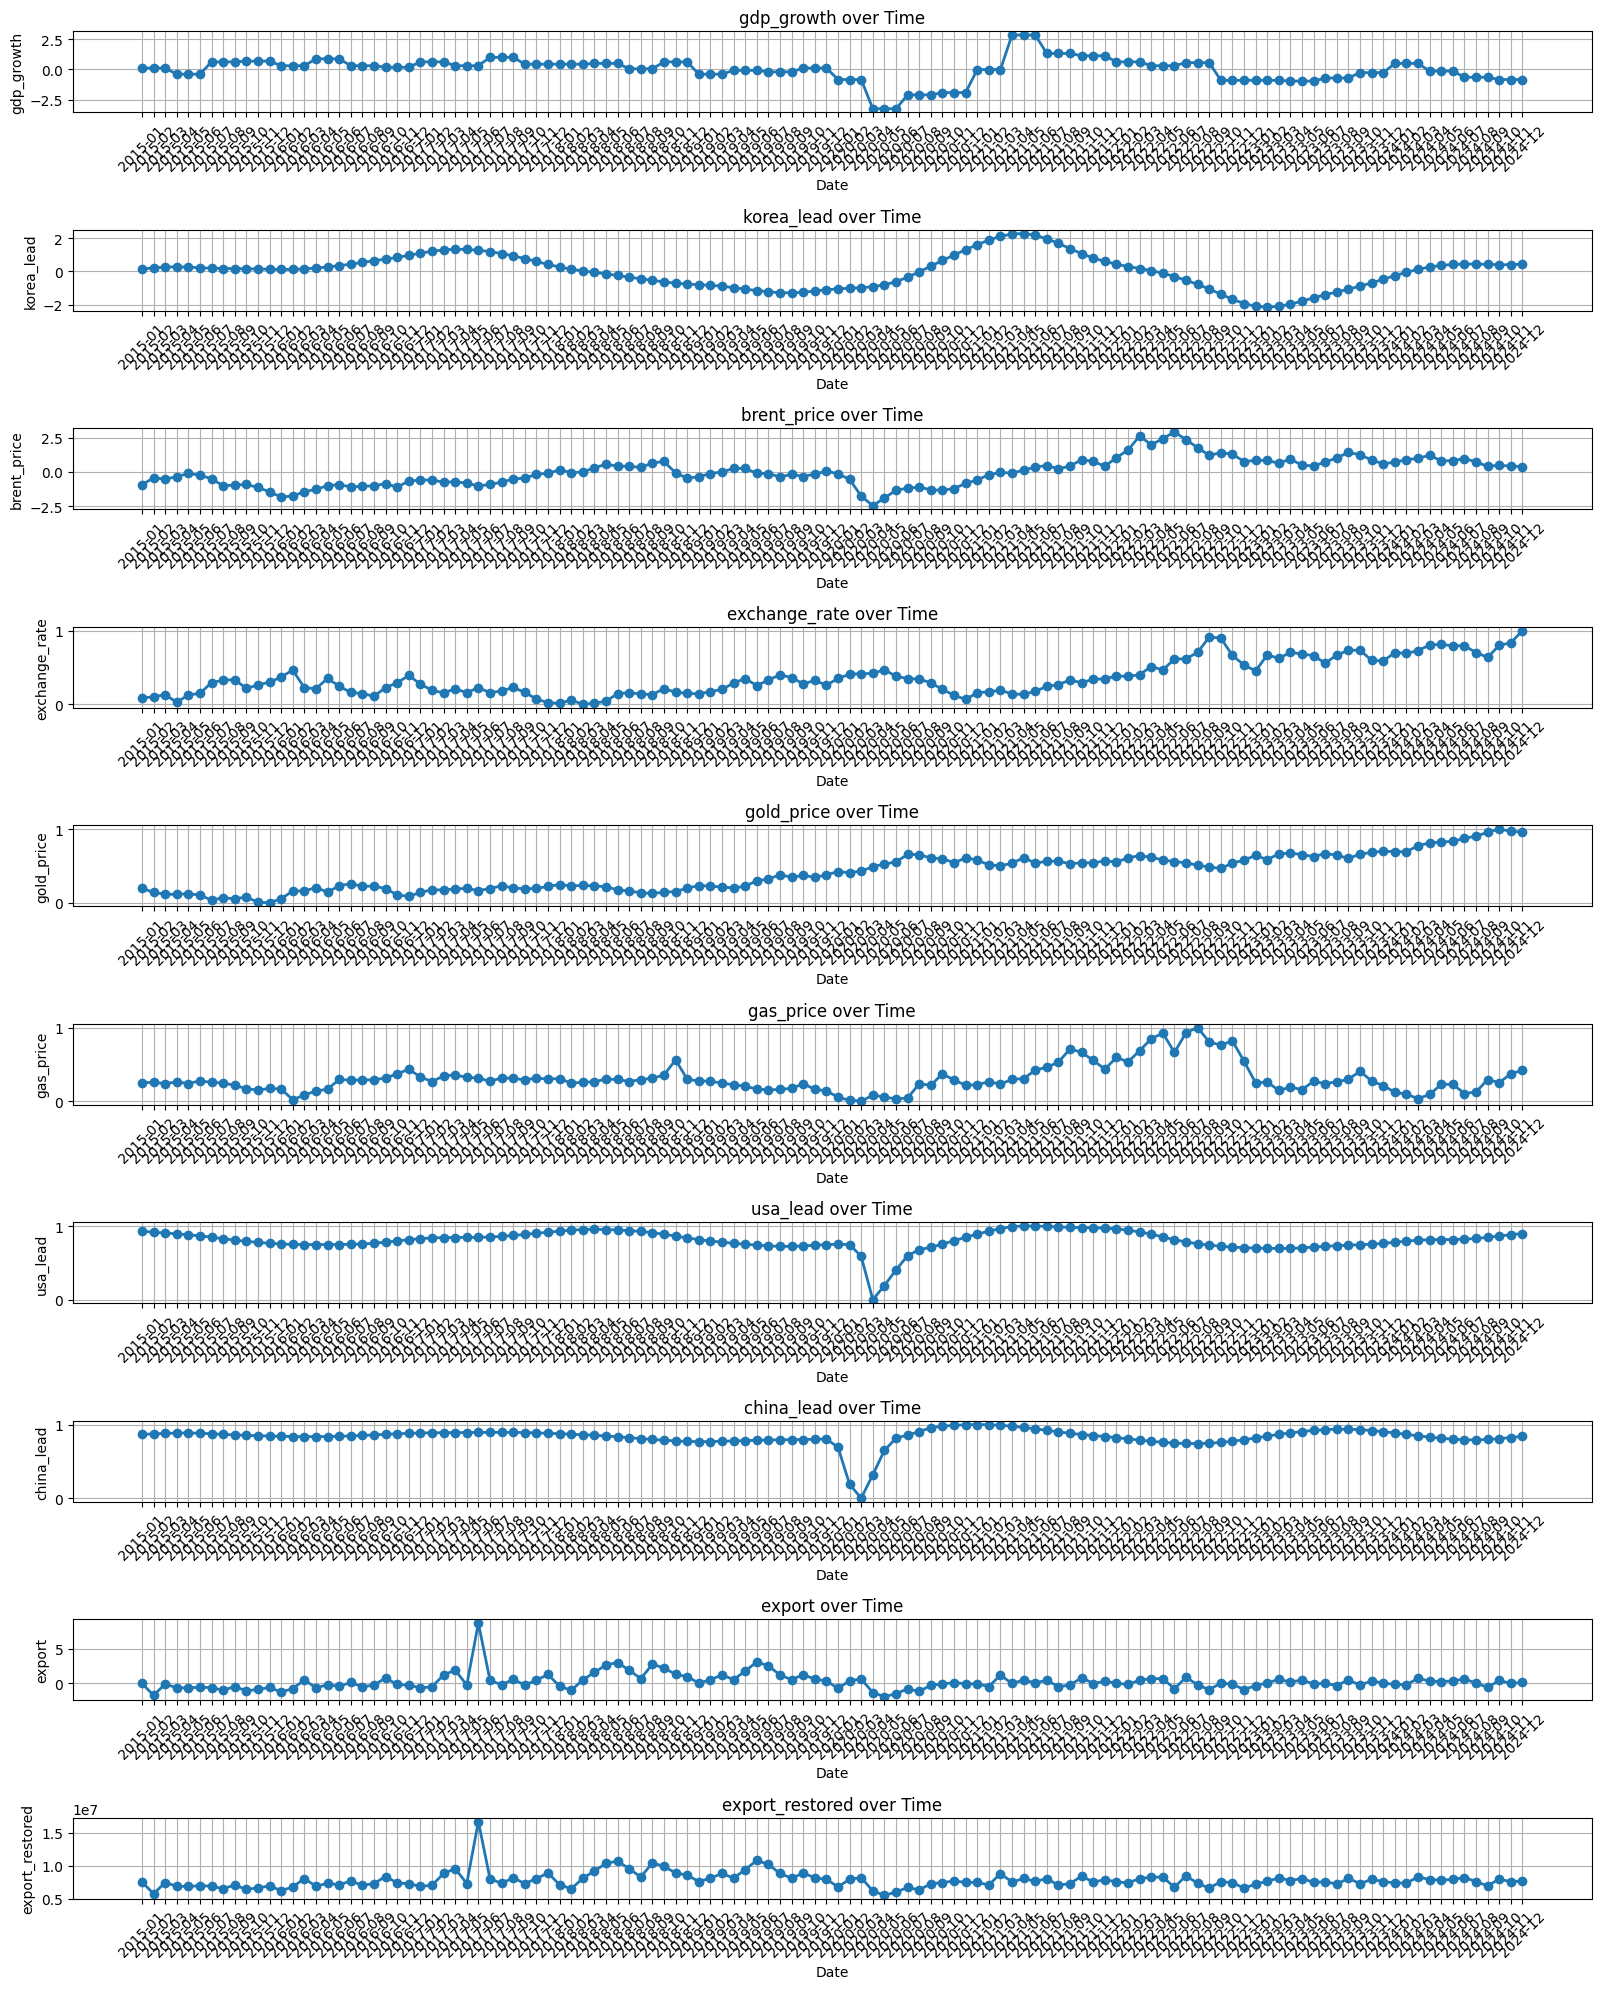

In [28]:
#각 피처의 시간에 따른 변화
features = ['gdp_growth', 'korea_lead', 'brent_price', 'exchange_rate',
       'gold_price', 'gas_price', 'usa_lead', 'china_lead', 'export',
       'export_restored']
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 20))

for i, col in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    plt.plot(df.index, df[col], marker='o', linestyle='-', linewidth=2)
    plt.title(f'{col} over Time')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.grid(True)
    plt.xticks(rotation=45)  # 기간 레이블 대각선 회전

plt.tight_layout()
plt.show()


In [31]:
df['usa_lead'].value_counts()

,count
usa_lead,
0.928952,1
0.916791,1
0.851990,1
0.889048,1
0.920120,1
...,...
0.915741,1
0.900944,1
0.886015,1


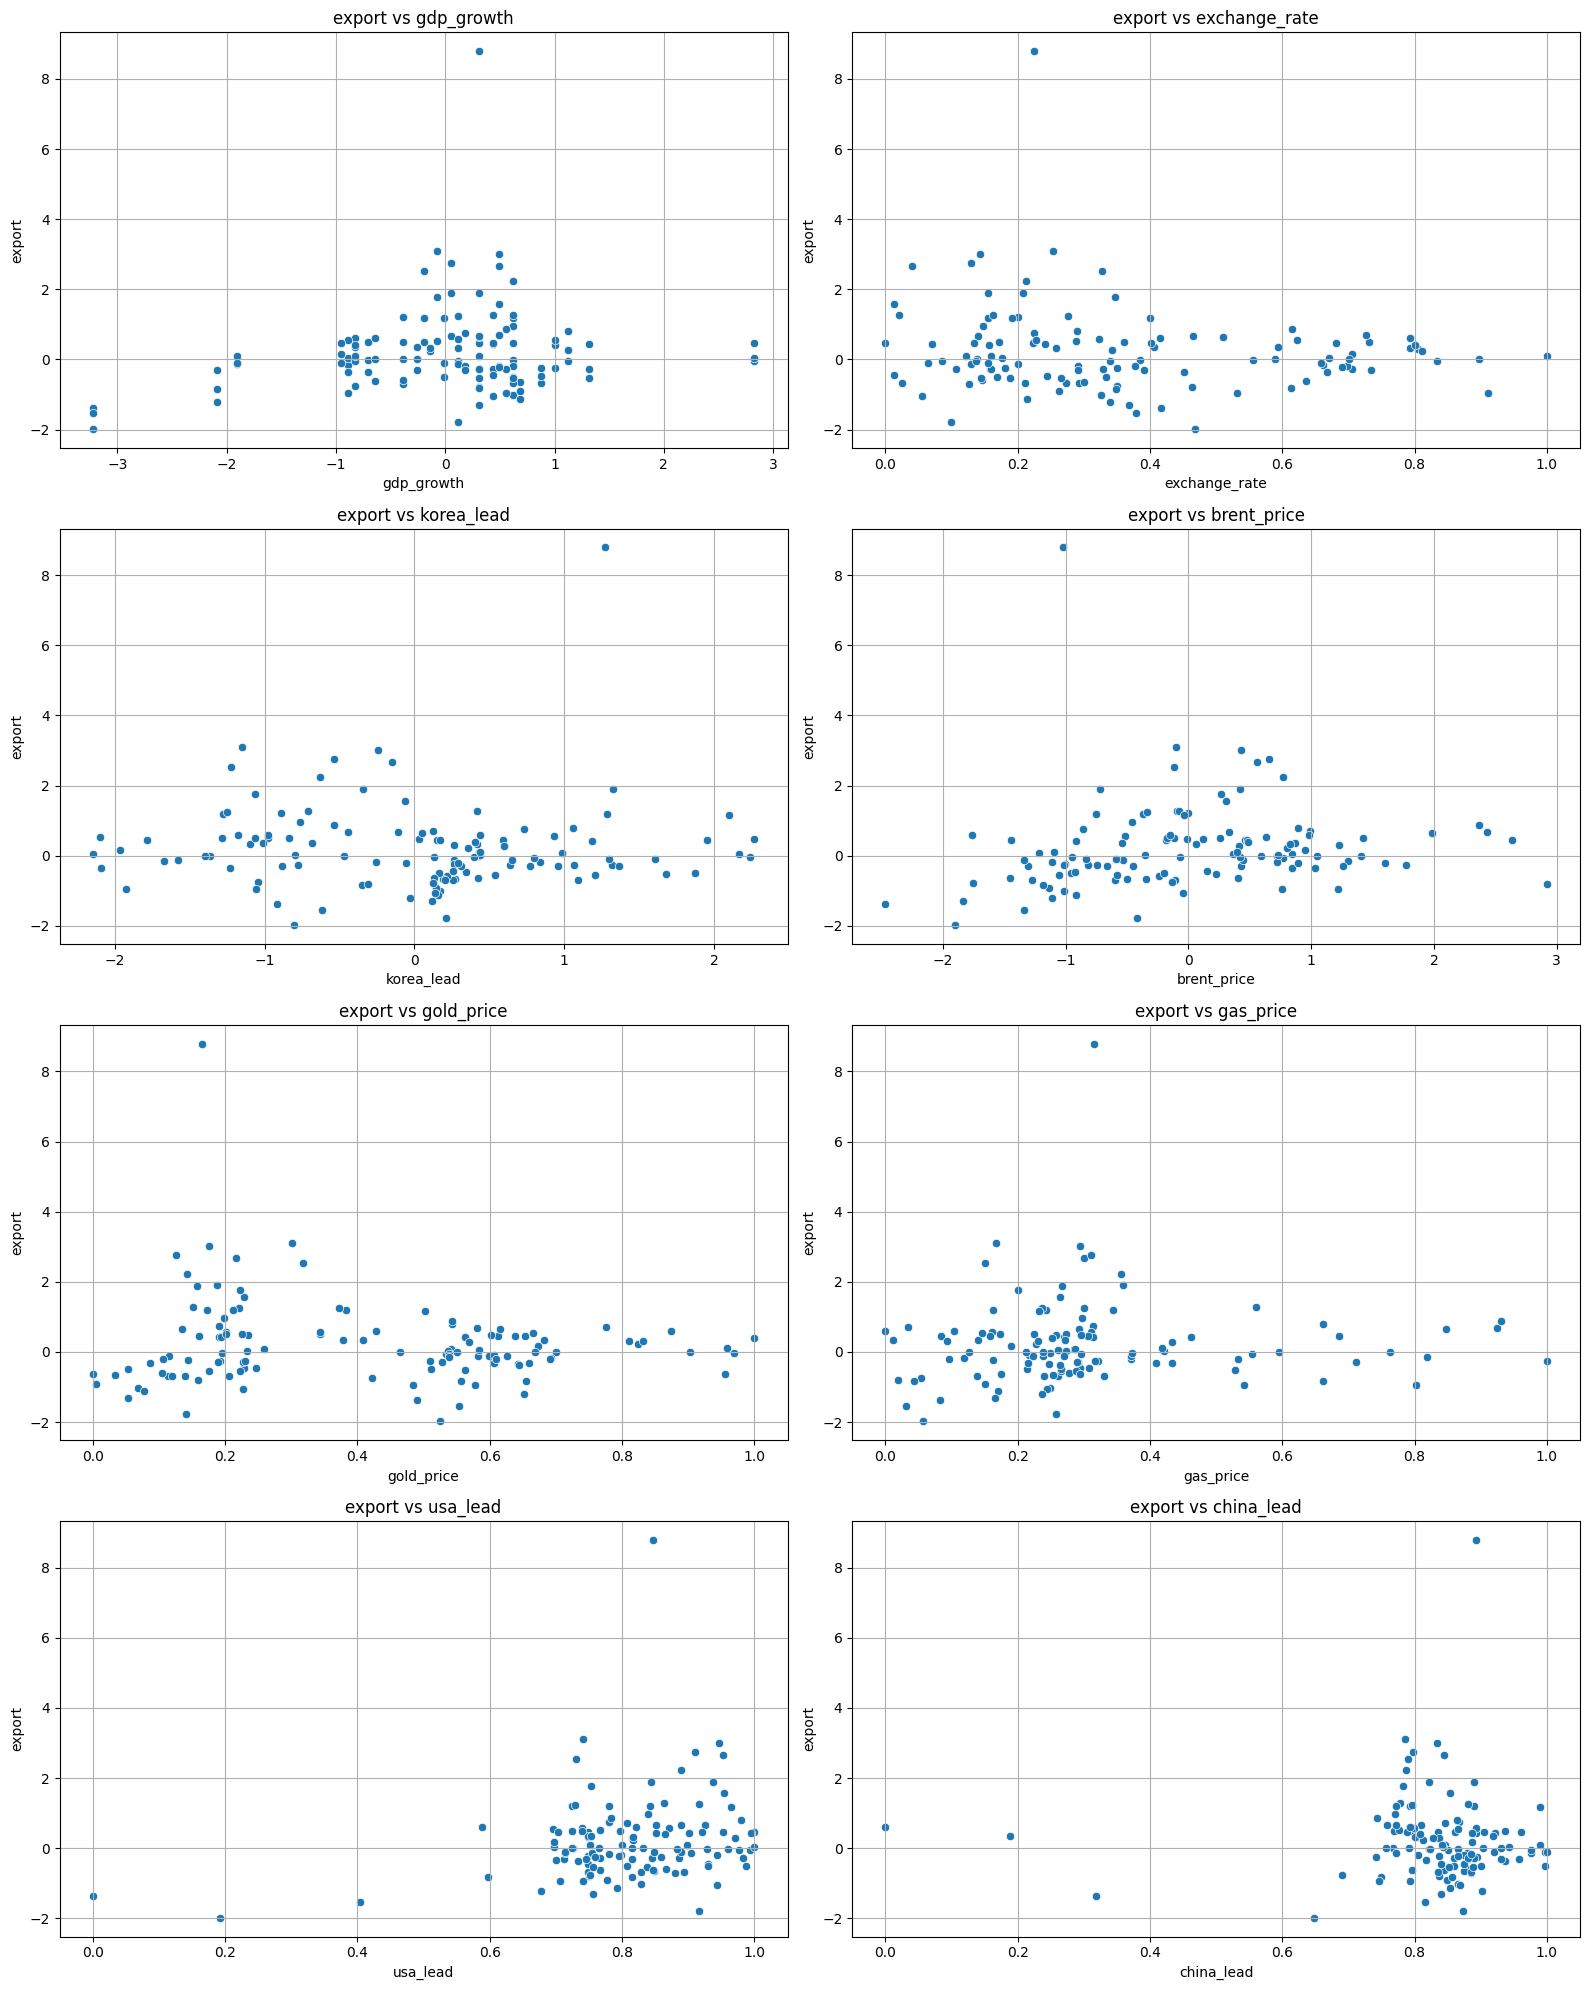

In [30]:
import seaborn as sns

target = 'export'
input_features = [
    'gdp_growth', 'exchange_rate', 'korea_lead', 'brent_price',
    'gold_price', 'gas_price', 'usa_lead', 'china_lead'
]

plt.figure(figsize=(16, 20))

for i, col in enumerate(input_features):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(data=df, x=col, y=target)
    plt.title(f'{target} vs {col}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.grid(True)

plt.tight_layout()
plt.show()


##변수 간 상관관계

## 시각화 및 상관행렬

# train test split

# 성능 평가 및 시각화